In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io  
from PIL import Image 
import matplotlib.pylab as plt

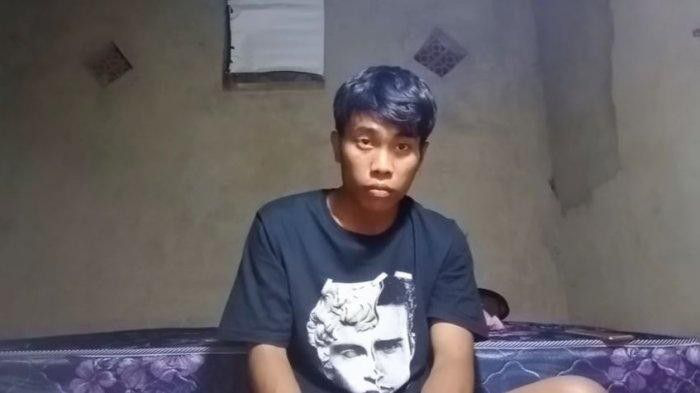

In [ ]:
url='https://assets.pikiran-rakyat.com/crop/0x0:0x0/x/photo/2020/07/30/2502942634.jpeg'
image_0 = io.imread(url) 
image = cv.cvtColor(image_0, cv.COLOR_BGR2RGB)
cv2_imshow(image)

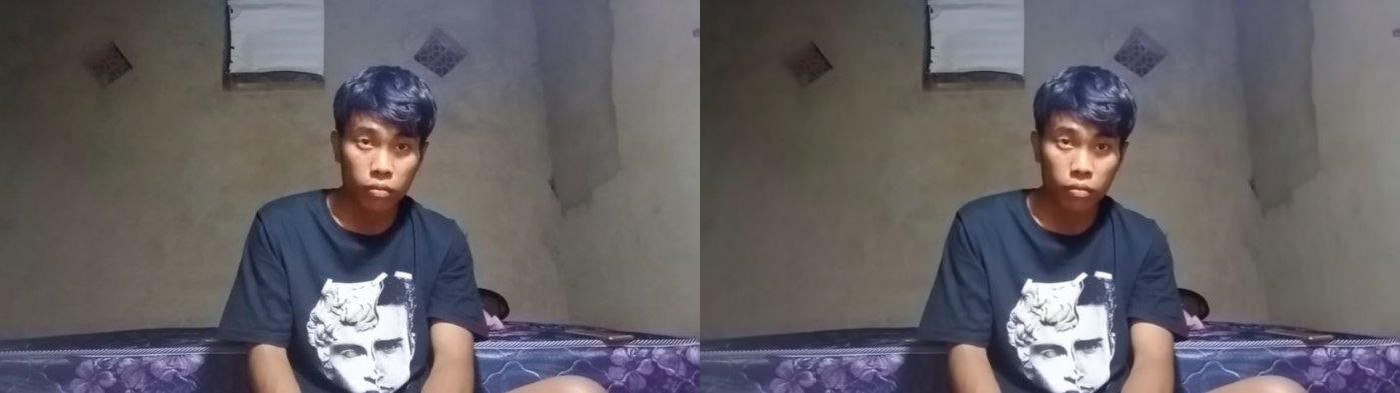

In [ ]:
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

identity = cv.filter2D(src=image, ddepth=-1, kernel=kernel)

cv2_imshow(cv.hconcat((image,identity)))

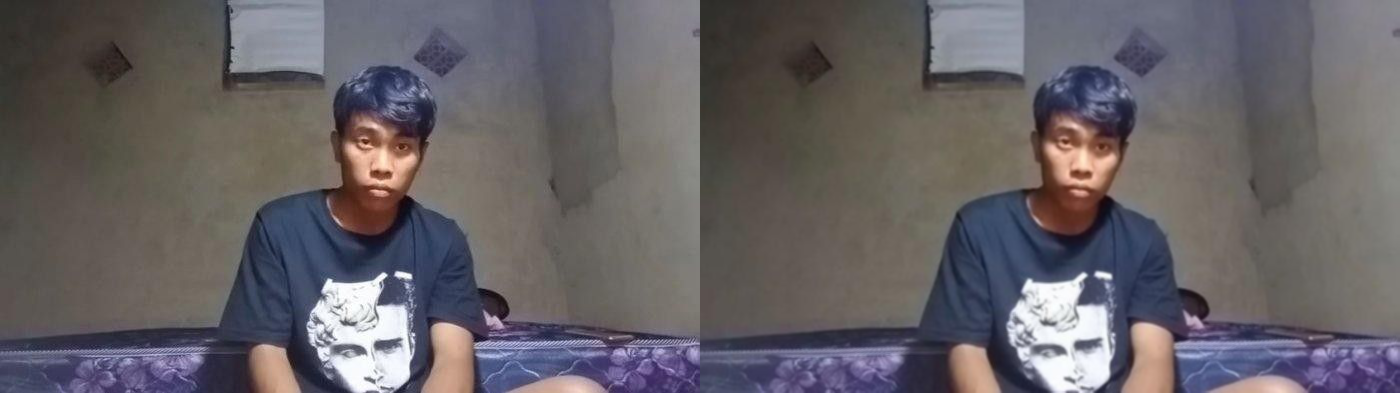

In [ ]:
kernel = np.ones((3, 3), np.float32) / 9

blur = cv.filter2D(src=image, ddepth=-1, kernel=kernel)

cv2_imshow(cv.hconcat((image,blur)))

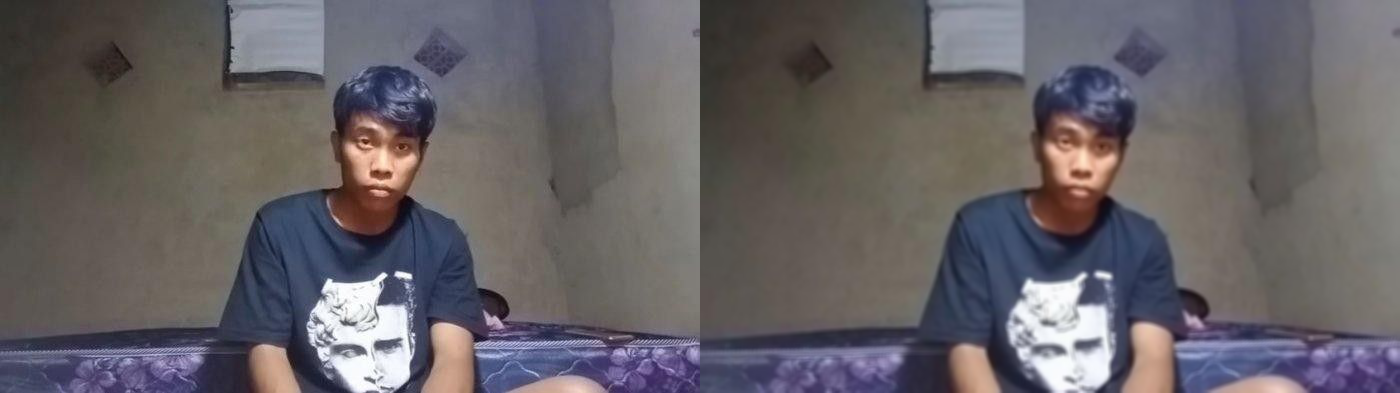

In [ ]:
cv_blur = cv.blur(src=image, ksize=(5,5))
cv2_imshow(cv.hconcat((image,cv_blur)))

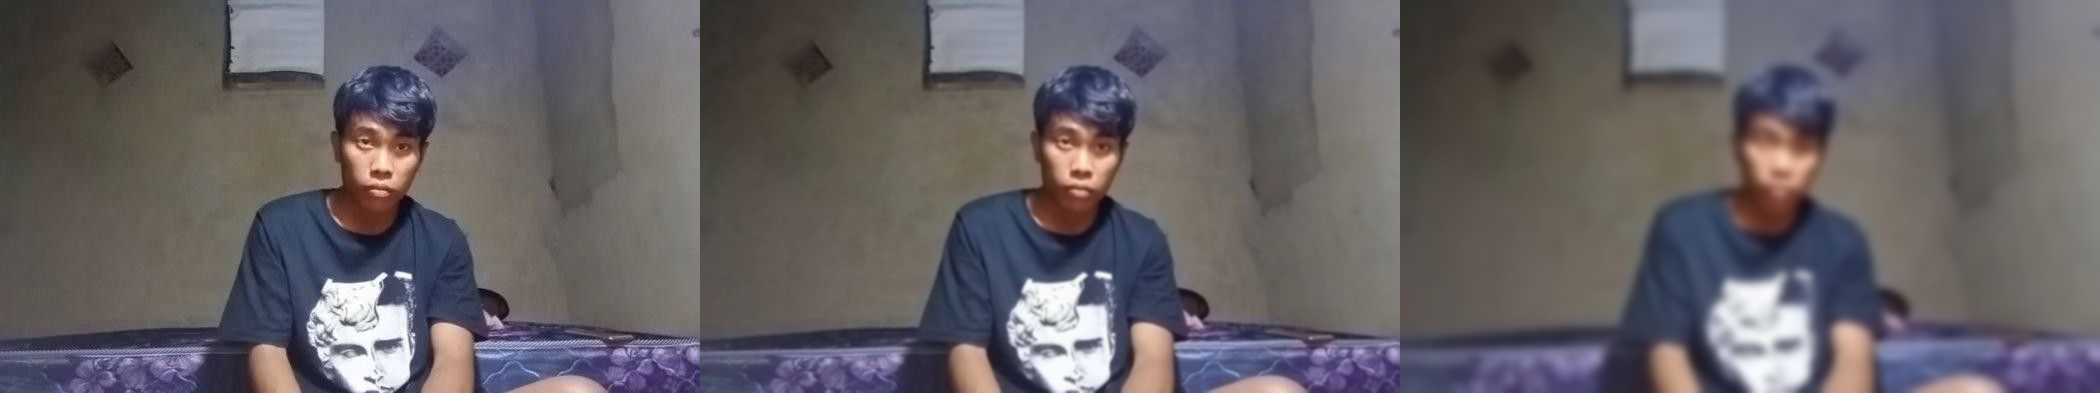

In [ ]:
cv_gaussianblur_5 = cv.GaussianBlur(src=image,ksize=(5,5),sigmaX=0)
cv_gaussianblur_25 = cv.GaussianBlur(src=image,ksize=(25,25),sigmaX=0)
cv_gaussianblur = cv.hconcat((image,cv_gaussianblur_5, cv_gaussianblur_25))

cv2_imshow(cv_gaussianblur)

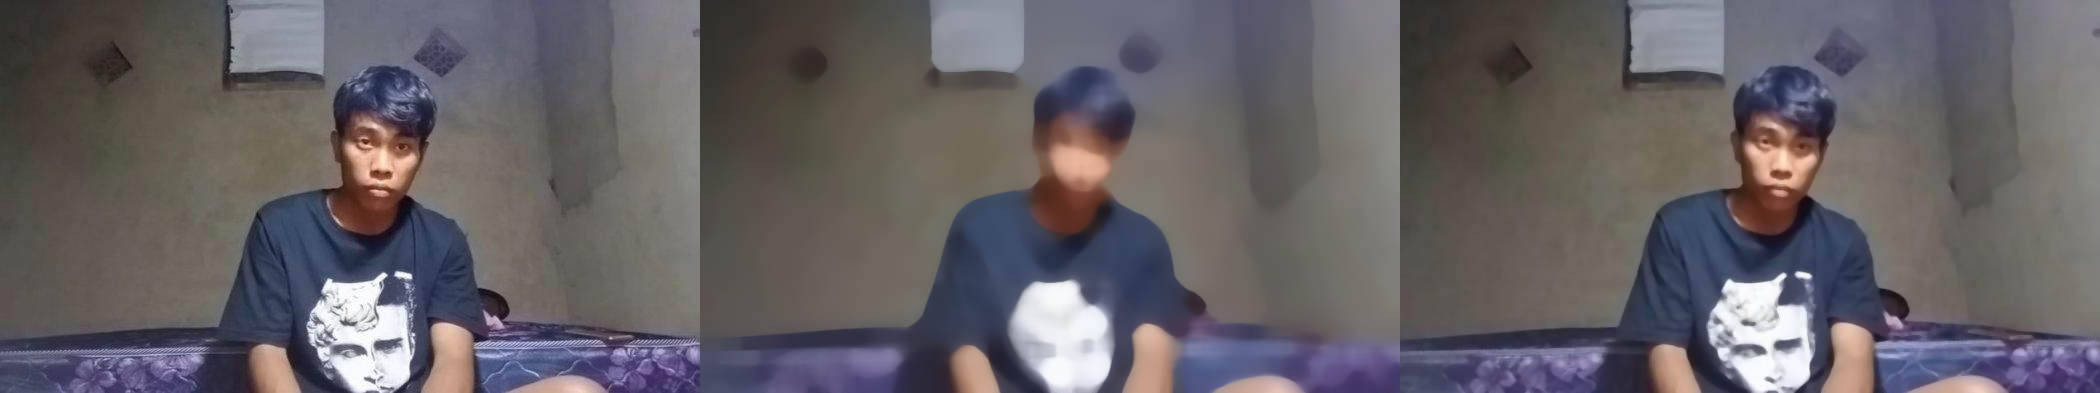

In [ ]:
cv_median_25 = cv.medianBlur(src=image, ksize=25)
cv_median_5 = cv.medianBlur(src=image, ksize=5)
cv_median = cv.hconcat((image,cv_median_25, cv_median_5))

cv2_imshow(cv_median)

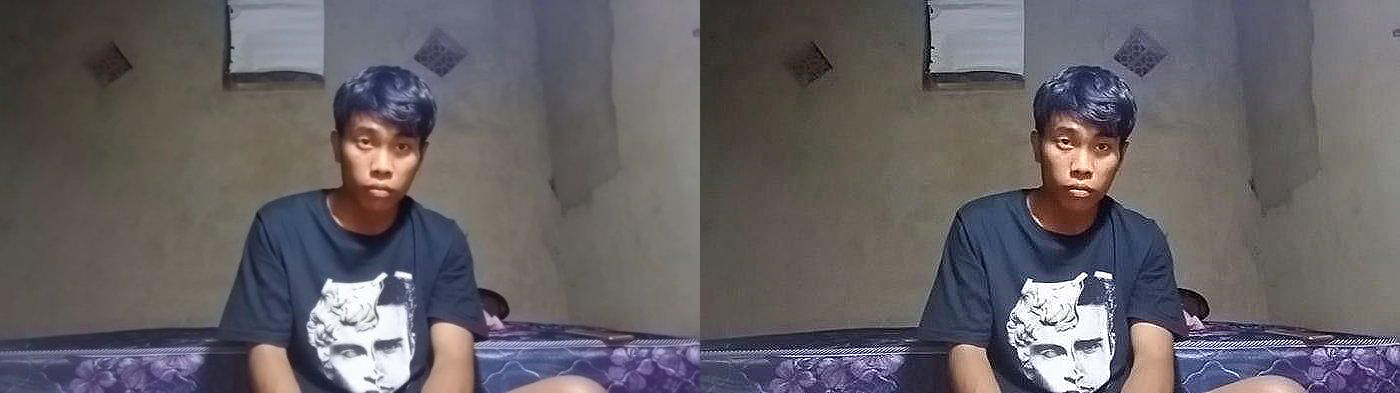

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharp = cv.filter2D(src=image, ddepth=-1, kernel=kernel)

sharpen= cv.hconcat((image,sharp))
cv2_imshow(sharpen)


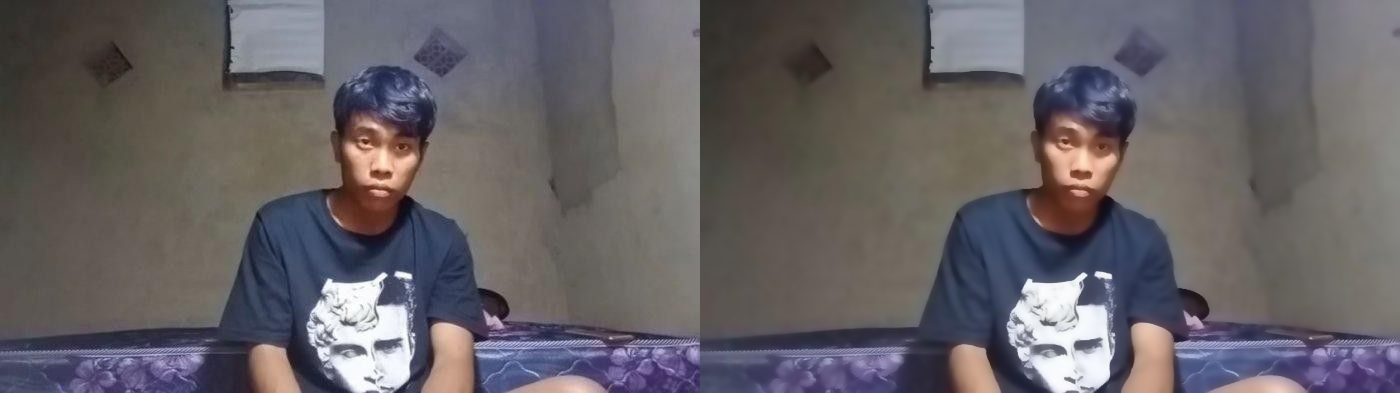

In [ ]:
bf = cv.bilateralFilter(src=image,d=9,sigmaColor=75,sigmaSpace=75)
bilateral= cv.hconcat((image,bf))
cv2_imshow(bilateral)

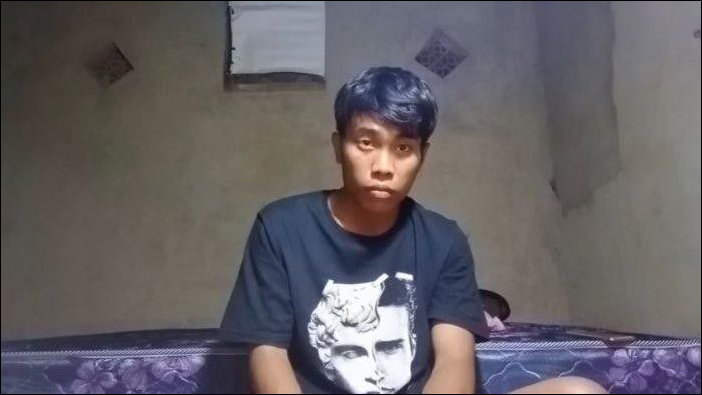

In [ ]:
def zero_padding(image):
    image = cv.copyMakeBorder(image, 1, 1, 1, 1, cv.BORDER_CONSTANT, value=0)
    cv2_imshow(image)
zero_padding(image)

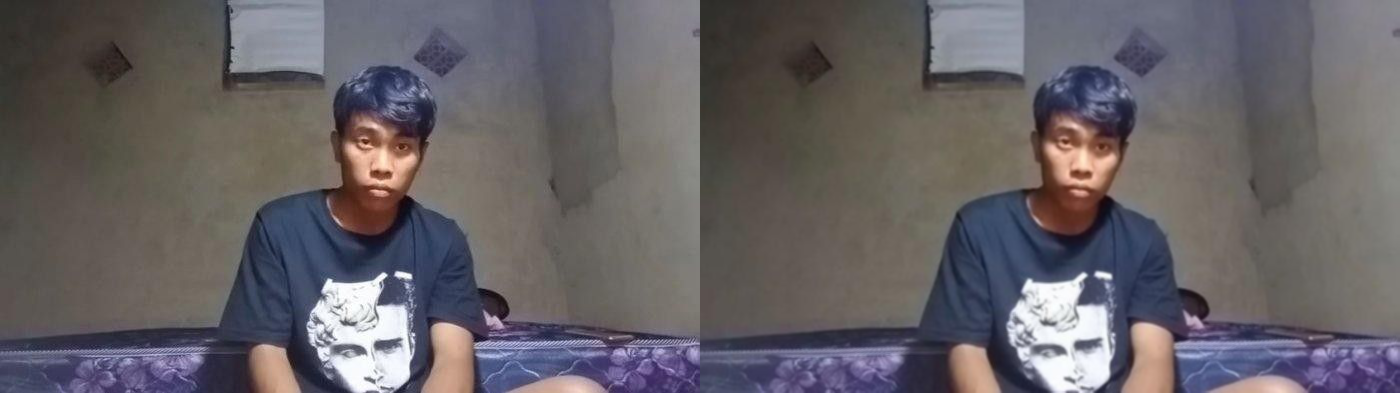

In [ ]:
def lowFilterPass(image):
    # create the low pass filter
    lowFilter = np.ones((3,3),np.float32)/9
    # apply the low pass filter to the image
    lowFilterImage = cv.filter2D(image,-1,lowFilter)
    return lowFilterImage
lfImage=lowFilterPass(image)
imglf= cv.hconcat((image,lfImage))

cv2_imshow(imglf)


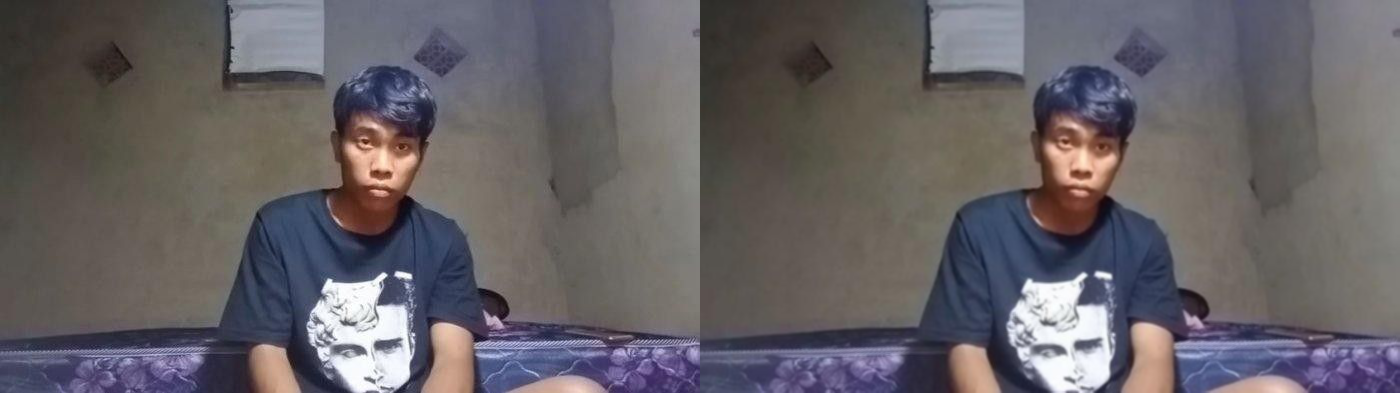

In [ ]:
def highFilterPass(image):
    # create the high pass filter
    highFilter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    # apply the high pass filter to the image
    highFilterImage = cv.filter2D(image,-1,highFilter)
    return highFilterImage
hfImage=highFilterPass(image)
imghf= cv.hconcat((image,hfImage))

cv2_imshow(imglf)  

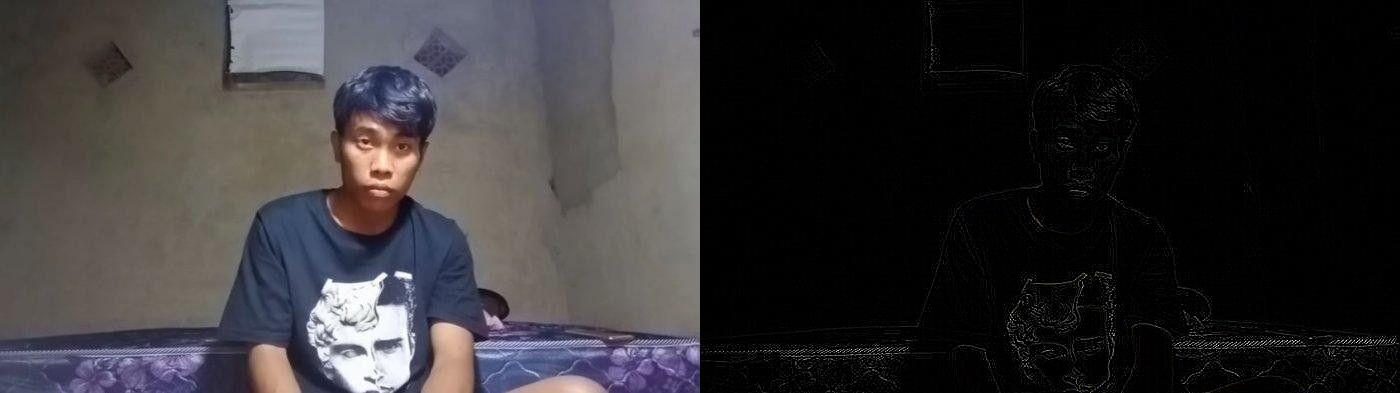

In [ ]:
def bandFilterPass(image):
    # create the band pass filter
    bandFilter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
    # apply the band pass filter to the image
    bandFilterImage = cv.filter2D(image,-1,bandFilter)
    return bandFilterImage
bpImage=bandFilterPass(image)
imgbp= cv.hconcat((image,bpImage))  
cv2_imshow(imgbp)

In [ ]:
# convert to grayscale
